<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Logistic Regression
 
_Authors: Multiple_
 
---

_Instructor Note: There are several portions of this lab that are half filled in.  You can use these as independent activity or a refresher walkthrough_

<a id="learning-objectives"></a>
### Learning Objectives
- Recall how to perform linear regression in scikit-learn.
- Demonstrate why logistic regression is a better alternative for classification than linear regression.
- Understand the concepts of probability, odds, e, log, and log-odds in relation to machine learning.
- Explain how logistic regression works.
- Interpret logistic regression coefficients.
- Use logistic regression with categorical features.
- Compare logistic regression with other models.
- Utilize different metrics for evaluating classifier models.
- Construct a confusion matrix based on predicted classes.

### Lesson Guide
- [Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn](#refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn)
- [Refresher: Interpreting Linear Regression Coefficients](#refresher-interpreting-linear-regression-coefficients)
- [Predicting a Categorical Response](#predicting-a-categorical-response)
- [Using Logistic Regression for Classification](#using-logistic-regression-for-classification)
- [Probability, e, Log, and Log Odds](#probability-odds-e-log-and-log-odds)
	- [Understanding e and the Natural Logarithm](#understanding-e-and-the-natural-logarithm)
	- [Log Odds](#the-log-odds)
- [What Is Logistic Regression?](#what-is-logistic-regression)
- [Interpreting Logistic Regression Coefficients](#interpreting-logistic-regression-coefficients)
- [Using Logistic Regression With Categorical Features](#using-logistic-regression-with-categorical-features)
- [Comparing Logistic Regression to Other Models](#comparing-logistic-regression-to-other-models)
- [Advanced Classification Metrics](#advanced-classification-metrics)
	- [Accuracy, True Positive Rate, and False Negative Rate](#accuracy-true-positive-rate-and-false-negative-rate)
	- [The Accuracy Paradox](#the-accuracy-paradox)
- [OPTIONAL: How Many Samples Are Needed?](#samples)
- [Lesson Review](#lesson-review)

# Introduction

In this lesson we learn about Logistic Regression, or what is sometimes referred to as Logistic Classification.

"How can a model be both a Regression and a Classification?" you may ask.  


## Discussion

Have you ever had to sort objects, but everything didn't fit perfectly into groups?

Example:
- Movies/Books
- Socks
- Phone apps


Logistic Regression/Classification uses elements from both the Linear Regression and the K Nearest Neighbors algorithms.

<a id="refresher-fitting-and-visualizing-a-linear-regression-using-scikit-learn"></a>
## Refresher: Fitting and Visualizing a Linear Regression Using scikit-learn
---
### Load Dataset for Lesson
Use Pandas to load in the glass attribute data from the UCI machine learning website. The columns are different measurements of properties of glass that can be used to identify the glass type. For detailed information on the columns in this data set, [please see the included .names file](http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.names).

#### Load in packages for EDA & Linear Regression

In [1]:
# Glass identification data set
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
sns.set(font_scale=1.5);

In [2]:
#Read dataset into memory
glass = pd.read_csv('../data/glass.csv')

In [3]:
#Review columns
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [4]:
#Inspect data
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
# change columns to something more uniform
glass.columns = ['ri','na','mg','al','si','k','ca','ba','fe','glass_type']

**Data Dictionary**

- `Id`: number: 1 to 214
- `RI`: refractive index  
- `Na`: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- `Mg`: Magnesium
- `Al`: Aluminum
- `Si`: Silicon
- `K` : Potassium
- `Ca`: Calcium
- `Ba`: Barium
- `Fe`: Iron
- `Type` : Type of glass:

**Pretend we want to predict `ri`, and our only feature is `al`. How could we do it using machine learning?**

<!--
**Answer:** We could frame it as a regression problem, and use a linear regression model with **`al`** as the only feature and **`ri`** as the response.
-->

**How would we visualize this model?**
<!--
**Answer:** Create a scatter plot with **`al`** on the x-axis and **`ri`** on the y-axis, and draw the line of best fit.
-->

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

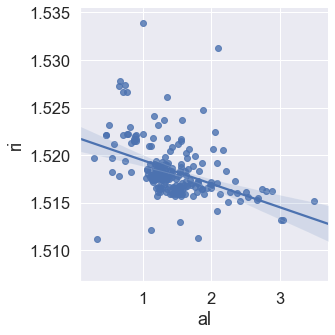

In [7]:
#scatter with regression line
sns.lmplot(x='al', y='ri', data=glass);

**How can we draw this plot (just the points — don't worry about the regression line) without using Seaborn?**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


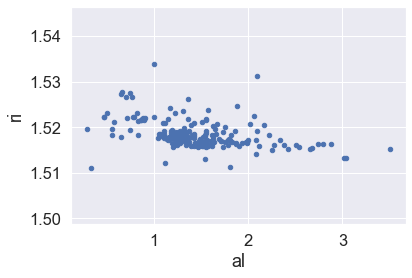

In [8]:
# Scatter plot using Pandas
glass.plot(kind='scatter', x='al', y='ri')

# Seaborn with parameters
#sns.lmplot(x='al', y='ri', data=glass, fit_reg=False);

# Equivalent scatter plot using Matplotlib
#plt.scatter(glass.al, glass.ri)
#plt.xlabel('al')
#plt.ylabel('ri')

To build a linear regression model to predict `ri` using scikit-learn, we will need to Import `LinearRegression` from `linear_model`.

**Using `LinearRegression`, fit a model predicting `ri` from `al` (and an intercept).**


Independent Exercise 1 (~5 mins)
- Step 1: Fill in the blanks below - build a linear regression model to predict ref_index using scikit-learn.
- Step 2: Run completed code to predict ref_index from al.

In [9]:
# Fit a linear regression model (name the model "linreg").
#Import the package needed
from sklearn.linear_model import LinearRegression

#Instantiate the ML object
linreg = LinearRegression()

#define your feature_cols
feature_cols = ['al']

#Set values to X & y
X = glass[feature_cols]
y = glass.ri


# fit the model
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Using the `LinearRegression` object we have fit, create a variable that are our predictions for `ri` for each row's `al` in the data set.**

In [10]:
# Make predictions for all values of X and add back to the original DataFrame.
y_pred = linreg.predict(X)

# new column of y_pred
glass['y_pred'] = y_pred

**Plot the predicted `ri` against each `al` as a line.**

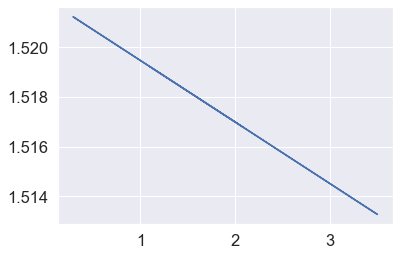

In [11]:
# Plot those predictions connected by a line (try plt.plot()).
plt.plot(glass.al, glass.y_pred);


_Note the y axis labels when comparing to seaborns plot_

**Plot this regression line with the scatter points on the same chart.**

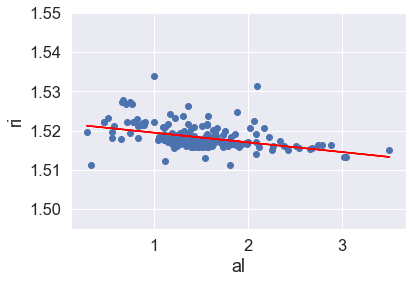

In [12]:
# Put the plots together (use a scatter and line graph).
plt.scatter(glass.al, glass.ri)
plt.plot(glass.al, glass.y_pred, color='red')
plt.xlabel('al')
plt.ylabel('ri');

<a id="refresher-interpreting-linear-regression-coefficients"></a>
## Refresher: Interpreting Linear Regression Coefficients
---

Recall the simple linear regression equation is $y = \beta_0 + \beta_1x$

$\beta_0$ is the intercept and $\beta_1$ is, in this case, our coefficient on the `al` predictor.

**Print out the intercept and coefficient values from our fit `LinearRegression` object.**

In [13]:
print(linreg.intercept_)
print(linreg.coef_)

1.5219453302386425
[-0.00247761]


**Manually compute the predicted value of `ri` when `al=2.0` using the regression equation.**

In [14]:
# Compute prediction for al=2 using the equation.
linreg.intercept_ + linreg.coef_[0] * 2

1.5169901174637033

**Confirm that this is the same value we would get when using the built-in `.predict()` method of the `LinearRegression` object.**

In [15]:
# Compute prediction for al=2 using the predict method.
linreg.predict(2)

ValueError: Expected 2D array, got scalar array instead:
array=2.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

**Coefficient interpretation:** A 1-unit increase in `al` is associated with a ~0.0025-unit decrease in `ri`.

**Intercept interpretation:** When `al = 0`, the estimated value of `ri` is 1.52194533024.

---

<a id="predicting-a-categorical-response"></a>
## Predicting a Single Categorical Response
---

Linear regression is appropriate when we want to predict the value of a continuous target/response variable, but what about when we want to predict membership in a class or category?

**Examine the glass type column in the data set. What are the counts in each category?**

In [16]:
# Examine glass_type.
glass.glass_type.value_counts().sort_index()

1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64

Say these types are subdivisions of broader glass types:

> **Window glass:** types 1, 2, and 3

> **Household glass:** types 5, 6, and 7

**Create a new `household` column that indicates whether or not a row is household glass, coded as 1 or 0, respectively.**

In [17]:
# Types 1, 2, 3 are window glass.
# Types 5, 6, 7 are household glass.
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0


Let's change our task, so that we're predicting the `household` category using `al`. Let's visualize the relationship to figure out how to do this.

**Make a scatter plot comparing `al` and `household`.**

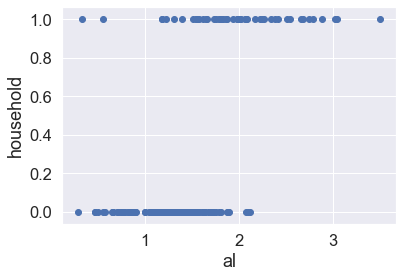

In [18]:
plt.scatter(glass.al, glass.household)
plt.xlabel('al')
plt.ylabel('household');

**Fit a new `LinearRegression` predicting `household` from `al`.**

Let's draw a regression line like we did before:

In [19]:
# Fit a linear regression model and store the predictions.
feature_cols = ['al']
X = glass[feature_cols] 
y = glass.household 
linreg.fit(X, y)
glass['household_pred'] = linreg.predict(X) # prediction via Lin Reg

Text(0, 0.5, 'household')

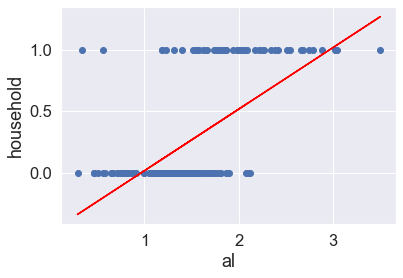

In [20]:
# Scatter plot that includes the regression line
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

If **al=3**, what class do we predict for household? **1**

If **al=1.5**, what class do we predict for household? **0**

We predict the 0 class for **lower** values of al, and the 1 class for **higher** values of al. What's our cutoff value? Around **al=2**, because that's where the linear regression line crosses the midpoint between predicting class 0 and class 1.

Therefore, we'll say that if **household_pred >= 0.5**, we predict a class of **1**, else we predict a class of **0**.

**Using this threshold, create a new column of our predictions for whether a row is household glass.**

In [21]:
# Understanding np.where
import numpy as np
nums = np.array([5, 15, 8])

# np.where returns the first value if the condition is True, and the second value if the condition is False.
np.where(nums > 10, 'big', 'small')

array(['small', 'big', 'small'], dtype='<U5')

In [22]:
# Transform household_pred to 1 or 0.
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


**Plot a line that shows our predictions for class membership in household vs. not.**

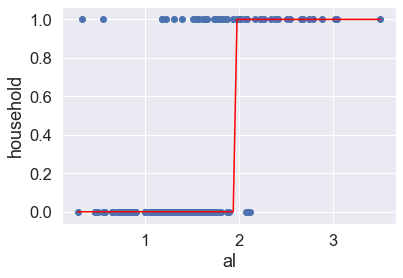

In [23]:
# sort so we can have a continuous line
glass.sort_values('al', inplace=True)
# Plot the class predictions.
plt.scatter(glass.al, glass.household)

plt.xlabel('al')
plt.ylabel('household')

plt.plot(glass.al, glass.household_pred_class, color='red');

<a id="using-logistic-regression-for-classification"></a>
## Using Logistic Regression for Classification
---

Logistic regression is a more appropriate method for what we just did with a linear regression. The values output from a linear regression cannot be interpreted as probabilities of class membership since their values can be greater than 1 and less than 0. Logistic regression, on the other hand, ensures that the values output as predictions can be interpreted as probabilities of class membership.

**Import the `LogisticRegression` class from `linear_model` below and fit the same regression model predicting `household` from `al`.**

A quick note on **'solvers'**:
- The solver tries to find the parameter weights that minimize a cost function.
- Starting out you can usually safely leverage the default.
- As you gain experience, [here's a good comparison to start understanding them more.](https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions/52388406#52388406)

In [24]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

feature_cols = ['al']
X = glass[feature_cols]
y = glass.household

logreg.fit(X,y)
pred = logreg.predict(X)

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Plot the predicted class using the logistic regression as we did for the linear regression predictions above.**

As you can see, the class predictions are the same.

Text(0, 0.5, 'household')

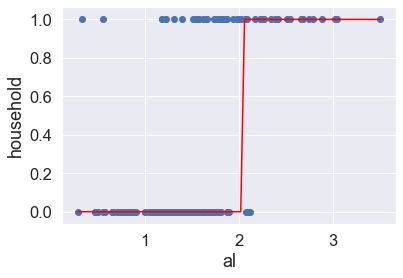

In [25]:
# Plot the class predictions.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, pred, color='red')
plt.xlabel('al')
plt.ylabel('household')

What if we wanted the predicted probabilities instead of just the class predictions, to understand how confident we are in a given prediction?

**Using the built-in `.predict_proba()` function, examine the predicted probabilities for the first handful of rows of `X`.**

In [26]:
logreg.predict_proba(X)[0:10]

array([[0.97193375, 0.02806625],
       [0.96905681, 0.03094319],
       [0.96017962, 0.03982038],
       [0.96017962, 0.03982038],
       [0.9569876 , 0.0430124 ],
       [0.95265323, 0.04734677],
       [0.95265323, 0.04734677],
       [0.95080573, 0.04919427],
       [0.94378757, 0.05621243],
       [0.94271112, 0.05728888]])

Sklearn orders the columns according to our class labels. The two-column output of `predict_proba` returns a column for each class of our `household` variable. The first column is the probability of `household=0` for a given row, and the second column is the probability of `household=1`.

**Store the predicted probabilities of class=1 in its own column in the data set.**

In [27]:
# Store the predicted probabilities of class 1.
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [28]:
glass.head(10)

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,y_pred,household,household_pred,household_pred_class,household_pred_prob
21,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,1.521227,0,-0.340495,0,0.028066
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1.521103,1,-0.315436,0,0.030943
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,1.520781,0,-0.250283,0,0.039820
50,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,1.520682,0,-0.230236,0,0.043012
183,1.51969,14.56,0.00,0.56,73.48,0.00,11.22,0.0,0.00,6,1.520558,1,-0.205177,0,0.047347
109,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.0,0.00,2,1.520558,0,-0.205177,0,0.047347
157,1.52121,14.03,3.76,0.58,71.79,0.11,9.65,0.0,0.00,3,1.520508,0,-0.195154,0,0.049194
152,1.51779,13.64,3.65,0.65,73.00,0.06,8.93,0.0,0.00,3,1.520335,0,-0.160071,0,0.056212
103,1.52725,13.80,3.15,0.66,70.57,0.08,11.64,0.0,0.00,2,1.520310,0,-0.155059,0,0.057289


**Plot the predicted probabilities as a line on our plot (probability of `household=1` as `al` changes).**

Text(0, 0.5, 'household')

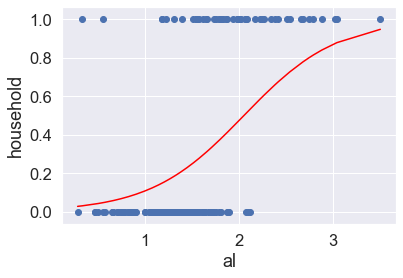

In [29]:
# Plot the predicted probabilities.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

In [30]:
# Examine some example predictions.
print(logreg.predict_proba([[1]]))
print(logreg.predict_proba([[2]]))
print(logreg.predict_proba([[3]]))

[[0.89253652 0.10746348]]
[[0.52645662 0.47354338]]
[[0.12953623 0.87046377]]


#### Note - if you try the probability without the brackets to make an array. You'll get an error like this one

In [31]:
logreg.predict_proba(3)

ValueError: Expected 2D array, got scalar array instead:
array=3.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Notice how the value error is 'Expected 2D array, got scalar array instead'

Remember the difference between a scalar (value) and a vector (value & direction). To transfort from a basic array into a 2d array we first have to create an array [] then allow it to have an additional dimension [array]. 
 
 - Creating the value in double [] solves for the error
 - Alternatively you could follow the recommendation and write np.array(value).reshape(-1,1)
 
Notice the change in error with the following

In [32]:
# Create a single dimension array
w=[3]
#Create a two dimensional array
V=[w]

In [33]:
#Pass each value into the below and see what happens with the error. First w then V.
logreg.predict_proba(V)

array([[0.12953623, 0.87046377]])

**Meaure Accuracy in the model**

In [34]:
#Logistic Regression
metrics.accuracy_score(glass.household, pred)
#logreg.score(X, y)

0.8411214953271028

### Traditionally there are two other steps we'd use when building a model. 


#### We haven't gone through them in depth (yet) but you should know about them

- **Train/Test split** - breaks our data into one component to learn from and one to test. The Machine Learning Laboratory so to speak. More on this in an upcoming class
- **Feature Selection** - Determining which features we'd want to use in our model. We discussed this at a high level in our LinearRegression lesson - but there are many "helper" packages you can find in the Sklearn [Feature Selection Documentation](https://scikit-learn.org/stable/modules/feature_selection.html)

**Train/Test Split**  - [documentation is here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [35]:
#Import the package
from sklearn.model_selection import train_test_split

#Set our X & y
X = glass[['al']]
y = glass.household

#Break it into a larger training set and smaller testing set (by default)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234)


#These are selected randomly with no replacement from our data so the random_state gives us all the same answer

**Build the model**

In [36]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

logistic_pred_class = logreg.predict(X_test)

#Measure accuracy
metrics.accuracy_score(y_test, logistic_pred_class)

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8333333333333334

**Feature Selection - Finding the strongest features**

For our purposes we'll use one of the methods from the documentation listed above `ExtraTreesClassifier` which is a tree-based estimator which can be used to compute feature importances, which in turn can be used to discard irrelevant features 

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

X = glass[['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']]
y = glass.household

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1234)

features = ExtraTreesClassifier(random_state=99)

features.fit(X_train, y_train)

print(features.feature_importances_) #Higher scores are better.

[0.09037661 0.04485984 0.4261776  0.11826067 0.04224342 0.04336325
 0.06340511 0.12972967 0.04158382]


C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [38]:
#### Understandably - that list can be confusing. Here's why it can be helpful keeping your feature_cols seperate

feature_cols=['ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe']

sorted(list(zip(features.feature_importances_,feature_cols)),reverse=True)

[(0.4261776034062702, 'mg'),
 (0.1297296656119344, 'ba'),
 (0.11826067490108967, 'al'),
 (0.09037661307058506, 'ri'),
 (0.06340511034253289, 'ca'),
 (0.04485984241117959, 'na'),
 (0.04336325440181846, 'k'),
 (0.04224341977884543, 'si'),
 (0.04158381607574431, 'fe')]

### Let's rebuild the model with the top two features

In [39]:
# Build out our testing 'laboratory' with train/test/split


X = glass[['mg','al']]
y = glass.household

X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X,y, random_state=1234)

#Build our model

logreg_fs = LogisticRegression()

logreg_fs.fit(X_train_fs,y_train_fs)

logistic_pred_class_fs = logreg_fs.predict(X_test_fs)

#Measure accuracy
print('Accuracy with Feature Selection ',metrics.accuracy_score(y_test_fs, logistic_pred_class_fs))
print('Accuracy w/o Feature Selection  ',metrics.accuracy_score(y_test, logistic_pred_class))

Accuracy with Feature Selection  0.8703703703703703
Accuracy w/o Feature Selection   0.8333333333333334


C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Exercise 2 - Candy Capers (10 minutes)

Since it's very likely we have little familiarity with glass chemistry - let's explore this with a new dataset involved candy

##### Data Dictionary
- `competitorname`: Brand
- `chocolate`: Does it contain chocolate?
- `fruity`: Is it fruit flavored?
- `caramel`: Is there caramel in the candy?
- `peanutalmondy`: Does it contain peanuts, peanut butter or almonds?
- `nougat`: Does it contain nougat?
- `crispedricewafer`: Does it contain crisped rice, wafers, or a cookie component?
- `hard`: Is it a hard candy?
- `bar`: Is it a candy bar?
- `pluribus`: Is it one of many candies in a bag or box?
- `sugarpercent`: The percentile of sugar it falls under within the data set.
- `pricepercent`: The unit price percentile compared to the rest of the set.
- `winpercent`: The overall win percentage according to 269,000 matchups.

In [40]:
# Read candy data into dictionary
candy = pd.read_csv('../data/candy-data.csv')

In [41]:
#Review data
candy.head()


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [42]:
#Add a likelihood to win column
candy.loc[candy.winpercent >50, 'win_flag'] = 1
candy.loc[candy.winpercent <=50, 'win_flag'] = 0

**Using the candy dataset, predict the probability of winning (class: 1 or 0).**

**First, instantiate the model and select X and Y variables**

In [43]:
feature_cols = ['chocolate', 'fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar', \
               'pluribus','sugarpercent','pricepercent']
X = candy[feature_cols]
y = candy.win_flag

**Split the data into Train and Test, `random_state=1234`**

In [44]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)

**Feature Selection using ExtraTreesClassifier, `random_state=99`**

In [45]:
features = ExtraTreesClassifier(random_state=99)

features.fit(X_train, y_train)

sorted(list(zip(features.feature_importances_, feature_cols)), reverse=True) #Higher scores are better. 

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[(0.20530480982591381, 'sugarpercent'),
 (0.18195075027088597, 'pricepercent'),
 (0.1770899079448381, 'bar'),
 (0.16966350896977495, 'chocolate'),
 (0.08718084862403785, 'peanutyalmondy'),
 (0.04400468174938289, 'caramel'),
 (0.03944370676834151, 'fruity'),
 (0.03641191016191016, 'pluribus'),
 (0.031225590464205272, 'crispedricewafer'),
 (0.0191756356313359, 'hard'),
 (0.008548649589373567, 'nougat')]

**Use the top 4 features and resplit the data**

In [46]:
feature_cols = ['sugarpercent','pricepercent','bar','chocolate']
X = candy[feature_cols]
y = candy.win_flag

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)

**Fit a logistic regression model and measure the Test Accuracy**

In [47]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

logistic_pred_class = logreg.predict(X_test)

#Measure accuracy
metrics.accuracy_score(y_test, logistic_pred_class)

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5909090909090909

**Save the predicted probabilities and save the probability of winning in a new column**

In [48]:
candy['pred_prob_win'] = logreg.predict_proba(X)[:,1]

In [49]:
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,win_flag,pred_prob_win
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1.0,0.830040
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1.0,0.800883
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.0,0.179995
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.0,0.205365
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1.0,0.268014


**Which Candy Bars outperformed the model predictions by the largest net margin, between the `winpercent` and predicted probability of winning?**

In [50]:
candy['actual_v_estimate'] = candy.winpercent/100-candy.pred_prob_win

In [51]:
candy.sort_values(by='actual_v_estimate', ascending=False)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,win_flag,pred_prob_win,actual_v_estimate
68,Starburst,0,1,0,0,0,0,0,0,1,0.151,0.220,67.037628,1.0,0.194835,0.475541
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998,1.0,0.183352,0.415288
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140,1.0,0.247611,0.383240
51,ReeseÕs Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257,1.0,0.462568,0.356094
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947,1.0,0.183352,0.344908
18,Haribo Gold Bears,0,1,0,0,0,0,0,0,1,0.465,0.465,57.119740,1.0,0.232296,0.338902
31,Lifesavers big ring gummies,0,1,0,0,0,0,0,0,0,0.267,0.279,52.911392,1.0,0.205976,0.323137
41,Nerds,0,1,0,0,0,0,1,0,1,0.848,0.325,55.354046,1.0,0.248956,0.304584
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695,1.0,0.247611,0.303425
73,Swedish Fish,0,1,0,0,0,0,0,0,1,0.604,0.755,54.861111,1.0,0.264753,0.283858


<a id="probability-odds-e-log-and-log-odds"></a>
## Probability, e, Log, and Log Odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. 

For example: 

- 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 
- 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

**As an example we can create a table of probabilities vs. odds, as seen below.**

In [52]:
# Create a table of probability versus odds.
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability / (1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding e and the Natural Logarithm

What is e? It is the base rate of growth shared by all continually growing processes:

e is the irrational base of the natural log `ln`.

- 2.718281828459

In [53]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

What is a (natural) log? 

It gives you the time needed to reach a certain level of growth:

In [54]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value

0.9999999999999832

In [55]:
np.log(e)

1.0

It is also the inverse of the exponential function:

In [56]:
# e^5
np.exp(5)

148.4131591025766

In [57]:
# np.exp(5)
2.7182818**5

148.41315133352072

In [58]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

5.0

Lets take one of our odds from out table and walk through how it works.

In [59]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

-1.3862943611198906

In [60]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))

0.25000000000000006
0.25


<a id="the-log-odds"></a>

When we take the logarithm of the odds, we get what is known as the **log odds**. This may seem like an arbitrary transformation, but it has an important property: The log odds has the range $[-\infty, \infty]$. This is not true for the odds ratio, which can never be a negative number.

In [61]:
# Add log odds to the table.
table['logodds'] = np.log(table['odds'])
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

<a id="interpreting-logistic-regression-coefficients"></a>
## Interpreting Logistic Regression Coefficients

---

Logistic regression coefficients are not as immediately interpretable as the coefficients from a linear regression. To interpret the coefficients we need to remember how the formulation for logistic regression differs from linear regression.

**First let's plot our logistic regression predicted probability line again.**

Text(0, 0.5, 'household')

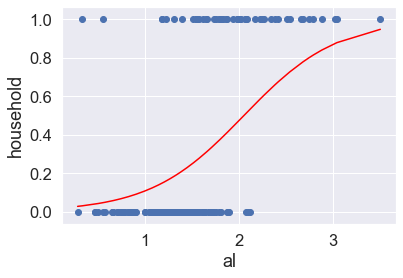

In [62]:
# Plot the predicted probabilities again.
plt.scatter(glass.al, glass.household)
plt.plot(glass.al, glass.household_pred_prob, color='red')
plt.xlabel('al')
plt.ylabel('household')

Remember:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

That means we'll get out the log odds if we compute the intercept plus the coefficient times a value for `al`.

**Compute the log odds of `household` when `al=2`.**

In [63]:
# Compute predicted log odds for al=2 using the equation.
logodds = logreg.intercept_ + logreg.coef_[0] * 2
logodds

array([-0.7901287 , -0.74185155,  0.879501  ,  1.01146299])

Now that we have the log odds, we will need to go through the process of converting these log odds to probability.

**Convert the log odds to odds, then the odds to probability.**

In [64]:
# Convert log odds to odds.
odds = np.exp(logodds)
odds

array([0.45378639, 0.47623133, 2.40969697, 2.74962074])

In [65]:
# Convert odds to probability.
prob = odds/(1 + odds)
prob

array([0.31214104, 0.32259939, 0.70671881, 0.73330636])

This finally gives us the predicted probability of `household=1` when `al=2`. You can confirm this is the same as the value you would get out of the `.predict_proba()` method of the sklearn object.

In [66]:
# Compute predicted probability for al=2 using the predict_proba method.
logreg.predict_proba([[2]])[:, 1]

ValueError: X has 1 features per sample; expecting 4

In [67]:
# Examine the coefficient for al.
logreg.coef_[0]

array([0.38924161, 0.41338018, 1.22405646, 1.29003745])

In [68]:
# Print the intercept.
logreg.intercept_

array([-1.56861191])

**Interpretation:** A 1-unit increase in `al` is associated with a 2.01-unit increase in the log odds of `household`.

In [69]:
# Increasing al by 1 (so that al=3)
logodds = -4.12790736 + 2.0109909641729442*3
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

0.8704637704833843

In [70]:
# Compute predicted probability for al=3 using the predict_proba method.
logreg.predict_proba([[3]])

ValueError: X has 1 features per sample; expecting 4

**Bottom line:** Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

In [71]:
# Examine the intercept.
logreg.intercept_

array([-1.56861191])

**Intercept interpretation:** For an `al` value of 0, the log-odds of `household` is -4.12790736.

In [72]:
# Convert log odds to probability.
logodds = logreg.intercept_
odds = np.exp(logodds)
prob = odds/(1 + odds)
prob

array([0.17241436])

That makes sense from the plot above, because the probability of `household=1` should be very low for such a low `al` value.

![Logistic regression beta values](../assets/logistic_betas.png)

Changing the $\beta_0$ value shifts the curve horizontally, whereas changing the $\beta_1$ value changes the slope of the curve.

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how).
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.

<a id="advanced-classification-metrics"></a>
## Advanced Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

There are 60 in class 0, nonsmokers, and 105 observations in class 1, smokers
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

We have 55 predictions of class, predicted as nonsmokers, and 110 of class 1, predicted to be smokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Categorize these as TP, TN, FP, or FN:**

Try not to look at the answers above.
    
- We predict nonsmoker, but the person is a smoker.
- We predict nonsmoker, and the person is a nonsmoker.
- We predict smoker and the person is a smoker.
- We predict smoker and the person is a nonsmoker.

<!--ANSWER
- FN
- TN
- TP
- FP
-->

<a id="accuracy-true-positive-rate-and-false-negative-rate"></a>
### Accuracy, True Positive Rate, and False Negative Rate

**Accuracy:** Overall, how often is the classifier correct?

<span>
    (<span style="color: green">TP</span>+<span style="color: red">TN</span>)/<span style="color: blue">total</span> = (<span style="color: green">100</span>+<span style="color: red">50</span>)/<span style="color: blue">165</span> = 0.91
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom; color: blue">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center; background-color: red">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center; background-color: green">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**True positive rate (TPR)** asks, “Out of all of the target class labels, how many were accurately predicted to belong to that class?”

For example, given a medical exam that tests for cancer, how often does it correctly identify patients with cancer?

<span>
<span style="color: green">TP</span>/<span style="color: blue">actual yes</span> = <span style="color: green">100</span>/<span style="color: blue">105</span> = 0.95
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center;background-color: green">TP = 100</td>
    <td style="text-align: center;color: blue">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**False positive rate (FPR)** asks, “Out of all items not belonging to a class label, how many were predicted as belonging to that target class label?”

For example, given a medical exam that tests for cancer, how often does it trigger a “false alarm” by incorrectly saying a patient has cancer?

<span>
<span style="color: orange">FP</span>/<span style="color: blue">actual no</span> = <span style="color: orange">10</span>/<span style="color: blue">60</span> = 0.17
</span>

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center;background-color: orange">FP = 10</td>
    <td style="text-align: center;color:blue">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

**Can you see that we might weigh TPR AND FPR differently depending on the situation?**

- Give an example when we care about TPR, but not FPR.
- Give an example when we care about FPR, but not TPR.

<!--
ANSWER:
- During an initial medical diagnosis, we want to be sensitive. We want initial screens to come up with a lot of true positives, even if we get a lot of false positives.
- If we are doing spam detection, we want to be precise. Anything that we remove from an inbox must be spam, which may mean accepting fewer true positives.
-->

**More Trade-Offs**

The true positive and false positive rates gives us a much clearer picture of where predictions begin to fall apart.

This allows us to adjust our models accordingly.

**Below we will load in some data on admissions to college.**

In [73]:
import pandas as pd
from sklearn import linear_model, model_selection, metrics

admissions = pd.read_csv('../data/admissions.csv')
admissions = admissions.dropna()
# Get dummy variables for prestige.
admissions = admissions.join(pd.get_dummies(admissions['prestige'], prefix='prestige'))

**We can predict the `admit` class from `gre` and use a train-test split to evaluate the performance of our model on a held-out test set.**

In [74]:
X = admissions[['gre']]
y = admissions['admit']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=46)
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Recall that our "baseline" accuracy is the proportion of the majority class label.**

In [75]:
1. - y_train.mean()

0.696969696969697

In [76]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.64


**Create a confusion matrix of predictions on our test set using `metrics.confusion_matrix`**.

In [77]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]
logit_pred = logit_simple.predict(X_test)

In [78]:
#Capture these against the dataframe
admissions['pred_prob']=logit_simple.predict_proba(X)[:,1]
admissions['pred'] = logit_simple.predict(X)

In [79]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)

# From confusion_matrix docs:
# In binary classification, the count of true negatives is (0,0), 
# false negatives is (1,0), 
# true positives is (1,1),
# and false positives is (0,1).
# [[FN TP]
#  [TN FP]]

array([[64,  0],
       [36,  0]], dtype=int64)

**Answer the following:**

- What is our accuracy on the test set?
- True positive rate?
- False positive rate?

<!--
ANSWER: This will depend on the data:
Accuracy: 64%
TPR: 0
FPR: 0
-->

In [80]:
# Answer here:

A good classifier would have a true positive rate approaching 1 and a false positive rate approaching 0.

In our smoking problem, this model would accurately predict all of the smokers as smokers and not accidentally predict any of the nonsmokers as smokers.

### Trading True Positives and True Negatives

By default, and with respect to the underlying assumptions of logistic regression, we predict a positive class when the probability of the class is greater than .5 and predict a negative class otherwise.

What if we decide to use .3 as a threshold for picking the positive class? Is that even allowed?

This turns out to be a useful strategy. By setting a lower probability threshold we will predict more positive classes. Which means we will predict more true positives, but fewer true negatives.

Making this trade-off is important in applications that have imbalanced penalties for misclassification.

The most popular example is medical diagnostics, where we want as many true positives as feasible. For example, if we are diagnosing cancer we prefer to have false positives, predict a cancer when there is no cancer, that can be later corrected with a more specific test.

We do this in machine learning by setting a low threshold for predicting positives which increases the number of true positives and false positives, but allows us to balance the the costs of being correct and incorrect.

**We can vary the classification threshold for our model to get different predictions.**

In [81]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .3)

array([[37, 27],
       [10, 26]], dtype=int64)

**Calculating the AUC with an ROC Curve**

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

roc_auc_score(y_true=y_test, y_score=logit_pred_proba)

0.7059461805555556

In [83]:
fpr, tpr, thresholds =roc_curve(y_test, logit_pred_proba)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.705946


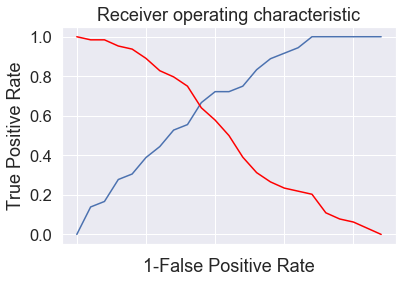

In [84]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), 'tnr' : pd.Series(1-fpr, index = i),'thresholds' : pd.Series(thresholds, index = i)})

# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'])
plt.plot(roc['tnr'], color = 'red')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([]);

In [85]:
roc

,fpr,tpr,tnr,thresholds
0,0.000000,0.000000,1.000000,1.407356
1,0.015625,0.138889,0.984375,0.407356
2,0.015625,0.166667,0.984375,0.396788
3,0.046875,0.277778,0.953125,0.375947
4,0.062500,0.305556,0.937500,0.365691
5,0.109375,0.388889,0.890625,0.355556
6,0.171875,0.444444,0.828125,0.345548
7,0.203125,0.527778,0.796875,0.335675
8,0.250000,0.555556,0.750000,0.325944
9,0.359375,0.666667,0.640625,0.316361


**Precision and Recall**

In [86]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, logit_pred_proba)
thresholds=np.append(thresholds, [1])

In [87]:
#Construct a Dataframe for the precision and recall curve

i = np.arange(len(precision)) # index for df
prc = pd.DataFrame({'precision' : pd.Series(precision, index=i),'recall' : pd.Series(recall, index = i), 'thresholds' : pd.Series(thresholds, index = i)})

In [88]:
#Review the dataframe
prc

,precision,recall,thresholds
0,0.413793,1.000000,0.245598
1,0.404762,0.944444,0.253834
2,0.402439,0.916667,0.262250
3,0.405063,0.888889,0.270843
4,0.405405,0.833333,0.279612
5,0.409091,0.750000,0.288552
6,0.448276,0.722222,0.297659
7,0.490566,0.722222,0.306931
8,0.510638,0.666667,0.316361
9,0.555556,0.555556,0.325944


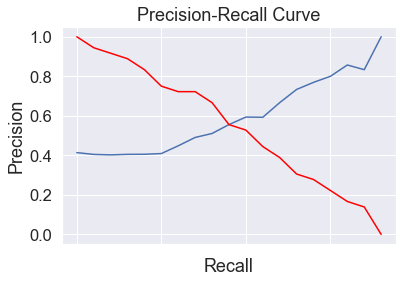

In [89]:
# Plot precision vs. recall
fig, ax = plt.subplots()
plt.plot(prc['precision'])
plt.plot(prc['recall'], color = 'red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
ax.set_xticklabels([]);

### Importance of staying up to date on libraries

The plotting above is needed to be done manually in Scikit-learn versions < 22.0 . Scikit-learn introduced packages to plot

- Confusion Matrices
- ROC curves
- Precision/Recall curves

[You can read up on these one liners here](https://scikit-learn.org/stable/modules/classes.html#id3)

### The Accuracy Paradox

Accuracy is a very intuitive metric — it's a lot like an exam score where you get total correct/total attempted. However, accuracy is often a poor metric in application. There are many reasons for this:
- Imbalanced problems problems with 95% positives in the baseline will have 95% accuracy even with no predictive power.
  - This is the paradox; pursuing accuracy often means predicting the most common class rather than doing the most useful work.
- Applications often have uneven penalties and rewards for true positives and false positives.
- Ranking predictions in the correct order be more important than getting them correct.
- In many case we need to know the exact probability of a positives and negatives.
  - To calculate an expected return.
  - To triage observations that are borderline positive.

**Some of the most useful metrics for addressing these problems are:**
    
- **Classification accuracy/error**
  - Classification accuracy is the percentage of correct predictions (higher is better).
  - Classification error is the percentage of incorrect predictions (lower is better).
  - Easiest classification metric to understand.
- **Confusion matrix**
  - Gives you a better understanding of how your classifier is performing.
  - Allows you to calculate sensitivity, specificity, and many other metrics that might match your business objective better than accuracy.
  - Precision and recall are good for balancing misclassification costs.
- **ROC curves and area under a curve (AUC)**
  - Good for ranking and prioritization problems.
  - Allows you to visualize the performance of your classifier across all possible classification thresholds, thus helping you to choose a threshold that appropriately balances sensitivity and specificity.
  - Still useful when there is high class imbalance (unlike classification accuracy/error).
  - Harder to use when there are more than two response classes.
- **Log loss**
  - Most useful when well-calibrated predicted probabilities are important to your business objective.
    - Expected value calculations
    - Triage

The good news is that these are readily available in Python and R, and are usually easy to calculate once you know about them.

<a id="samples"></a>
## OPTIONAL: How Many Samples Are Needed?

We often ask how large our data set should be to achieve a reasonable logistic regression result. Below, a few methods will be introduced for determining how accurate the resulting model will be.

### Rule of Thumb

**Quick:** At least 100 samples total. At least 10 samples per feature.

**Formula method:**
1. Find the proportion $p$ of positive cases and negative cases. Take the smaller of the two. 
    - Ideally, you want 50/50 for a proportion of 0.5.
    - Example: Suppose we are predicting "male" or "female". Our data is 80% male, 20% female. 
        - So, we choose the proportion $p = 0.2$ since it is smaller.

2. Find the number of independent variables $k$.
    - Example: We are predicting gender based on the last letter of the first name, giving us 26 indicator columns for features. So, $k = 26$.

3. Let the minimum number of cases be $N = \frac{10k}{p}$. The minimum should always be set to at least $100$.
    - Example: Here, $N = 10*26 / 0.2 = 1300$. So, we would need 1300 names (supposing 80% are male).


Both methods from: Long, J. S. (1997). *Regression Models for Categorical and Limited Dependent Variables*. Thousand Oaks, CA: Sage Publications.


### Statistical Testing

Logistic regression is one of the few machine learning models where we can obtain comprehensive statistics. By performing hypothesis testing, we can understand whether we have sufficient data to make strong conclusions about individual coefficients and the model as a whole. A very popular Python library which gives you these statistics with just a few lines of code is [statsmodels](http://www.statsmodels.org/dev/index.html).


### Power Analysis

As you may suspect, many factors affect how statistically significant the results of a logistic regression are. The art of estimating the sample size to detect an effect of a given size with a given degree of confidence is called power analysis.

Some factors that influence the accuracy of our resulting model are:

+ Desired statistical significance (p-value)
+ Magnitude of the effect
    - It is more difficult to distinguish a small effect from noise. So, more data would be required!
+ Measurement precision
+ Sampling error
    - An effect is more difficult to detect in a smaller sample.
+ Experimental design

So, many factors, in addition to the number of samples, contribute to the resulting statistical power. Hence, it is difficult to give an absolute number without a more comprehensive analysis. This analysis is out of the scope of this lesson, but it is important to understand some of the factors that affect confidence.

## Lesson Review
- **Logistic regression**
  - What kind of machine learning problems does logistic regression address?
  - What do the coefficients in a logistic regression represent? How does the interpretation differ from ordinary least squares? How is it similar?
  
- **The confusion matrix**
  - How do true positive rate and false positive rate help explain accuracy?
  - Why might one classification metric be more important to tune than another? Give an example of a business problem or project where this would be the case.

### Optional Practice - NBA Shotmakers

In [90]:
# Read new dataset into memory
nba = pd.read_csv('../data/NBA_shots.csv')

In [91]:
#review data
print(nba.columns)
nba.head()

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER',
       'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER',
       'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS',
       'player_name', 'player_id', 'SHOOTER_height', 'DEFENDER_height'],
      dtype='object')


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,SHOOTER_height,DEFENDER_height
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,73,78
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,8,4,8:00,3.4,3,...,made,"Plumlee, Mason",203486,2.1,1,2,brian roberts,203148,73,83
2,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,3,4,11:32,12.1,14,...,made,"Lin, Jeremy",202391,1.8,1,2,brian roberts,203148,73,75
3,21400890,"MAR 03, 2015 - CHA vs. LAL",H,W,1,4,4,8:55,4.3,2,...,made,"Hill, Jordan",201941,5.4,1,2,brian roberts,203148,73,82
4,21400859,"FEB 27, 2015 - CHA @ BOS",A,L,-8,2,2,10:38,6.4,3,...,made,"Young, James",203923,5.6,1,3,brian roberts,203148,73,78


**Given this dataset, use your knowledge to create a logistic regression model to predict whether a shot is made or missed (`FGM`), that uses the best features and avoids data leakage.  Additionally, ignore the player and defender names.**

In [92]:
# First subset variables that avoid data leakage or would be irrelevant
nba2 = nba[['SHOT_NUMBER',
       'PERIOD', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT',
       'CLOSE_DEF_DIST', 'FGM', 'SHOOTER_height','DEFENDER_height']]

In [93]:
# Review the data
nba2.head()

,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST,FGM,SHOOTER_height,DEFENDER_height
0,1,1,10.8,2,1.9,7.7,2,made,1.3,1,73,78
1,8,4,3.4,3,2.5,3.5,2,made,2.1,1,73,83
2,3,4,12.1,14,11.9,14.6,2,made,1.8,1,73,75
3,4,4,4.3,2,2.9,5.9,2,made,5.4,1,73,82
4,2,2,6.4,3,2.7,24.7,3,made,5.6,1,73,78


In [94]:
#Feature Engineering
nba2['height_diff']=nba2['SHOOTER_height']-nba2['DEFENDER_height']

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [95]:
#Shot clock has a lot of missing values, so I will remove
nba2.isnull().sum()

SHOT_NUMBER           0
PERIOD                0
SHOT_CLOCK         5567
DRIBBLES              0
TOUCH_TIME            0
SHOT_DIST             0
PTS_TYPE              0
SHOT_RESULT           0
CLOSE_DEF_DIST        0
FGM                   0
SHOOTER_height        0
DEFENDER_height       0
height_diff           0
dtype: int64

In [96]:
#X and y

feature_cols =['SHOT_NUMBER',
       'PERIOD','DRIBBLES', 'TOUCH_TIME',
       'SHOT_DIST', 'PTS_TYPE',
       'CLOSE_DEF_DIST', 'SHOOTER_height','DEFENDER_height','height_diff']
X=nba2[feature_cols]

y=nba.FGM



In [97]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)

In [98]:
#Feature Selection using ExtraTreesClassifier, `random_state=99`
features = ExtraTreesClassifier(random_state=99)

features.fit(X_train, y_train)

sorted(list(zip(features.feature_importances_, feature_cols))) #Higher scores are better. 

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[(0.007569528477801887, 'PTS_TYPE'),
 (0.0591776521153599, 'PERIOD'),
 (0.0600830996294812, 'DRIBBLES'),
 (0.07201899042677132, 'SHOOTER_height'),
 (0.0750015809297509, 'DEFENDER_height'),
 (0.08260381455760651, 'height_diff'),
 (0.12781557484838701, 'SHOT_NUMBER'),
 (0.15266465223413211, 'TOUCH_TIME'),
 (0.167788607365358, 'CLOSE_DEF_DIST'),
 (0.1952764994153512, 'SHOT_DIST')]

In [99]:
# Use the top 4 features and resplit the data
feature_cols = ['SHOT_NUMBER','TOUCH_TIME','SHOT_DIST', 'CLOSE_DEF_DIST']
X = nba2[feature_cols]
y = nba2.FGM

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1234)

In [100]:
# Fit a logistic regression model and measure the Test Accuracy
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

logistic_pred_class = logreg.predict(X_test)

#Measure accuracy
metrics.accuracy_score(y_test, logistic_pred_class)

C:\Users\slongstreet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6005371978262227

In [101]:
#Append predictions back to dataset
nba['predicted_prob'] = logreg.predict_proba(X)[:, 1]

**What are your coefficients and how would you use this information to suggest shots to players?**

In [102]:
list(zip(logreg.coef_[0], feature_cols))

[(0.0034810951933580848, 'SHOT_NUMBER'),
 (-0.03375179542684647, 'TOUCH_TIME'),
 (-0.06369438205185271, 'SHOT_DIST'),
 (0.10752465356293439, 'CLOSE_DEF_DIST')]

**Who are the top 5 players in terms of taking the highest probability shots? What would this suggest about additionall variables for the model, or perhaps building multiple models?**

In [103]:
pd.DataFrame(nba.groupby('player_name')['predicted_prob'].mean()).sort_values('predicted_prob', ascending=False)

,predicted_prob
player_name,
greg smith,0.592355
deandre jordan,0.591482
tyson chandler,0.588199
omer asik,0.587344
rudy gobert,0.574537
joey dorsey,0.574481
mason plumlee,0.568929
tristan thompson,0.563958
andre drummond,0.563238


**Does the Home Team or Away Team take higher probability shots?**

In [104]:
pd.DataFrame(nba.groupby('LOCATION')['predicted_prob'].mean()).sort_values('predicted_prob', ascending=False)

,predicted_prob
LOCATION,
H,0.453749
A,0.452291


**Does the Winning Team or Losing Team take higher probability shots?**

In [105]:
pd.DataFrame(nba.groupby('W')['predicted_prob'].mean()).sort_values('predicted_prob', ascending=False)

,predicted_prob
W,
W,0.453935
L,0.452087


**Calculate the expected value of 3 point shots vs. 2 point shots.**

In [106]:
pts_prob=pd.DataFrame(nba.groupby('PTS_TYPE')['predicted_prob'].mean()).sort_values('predicted_prob', ascending=False)

In [107]:
pts_prob.reset_index(inplace=True)

In [108]:
pts_prob['PTS_TYPE']=pd.to_numeric(pts_prob['PTS_TYPE'])

In [109]:
pts_prob['Expected']=pts_prob['PTS_TYPE']*pts_prob['predicted_prob']

In [110]:
pts_prob

,PTS_TYPE,predicted_prob,Expected
0,2,0.492192,0.984383
1,3,0.344185,1.032556
